# Conv2d_NN Test varying K

In [1]:
import sys 
sys.path.append('../')
import time
import os 


import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchsummary import summary 

from Conv2d_NN_spatial import Conv2d_NN_spatial
from Conv2d_NN import Conv2d_NN
from pixelshuffle import PixelShuffle1D, PixelUnshuffle1D


from data import MNIST, FashionMNIST, CIFAR10
from train import train_model, evaluate_accuracy 


### MNIST + FashionMNIST + CIFAR10 Data

Files already downloaded and verified
Files already downloaded and verified


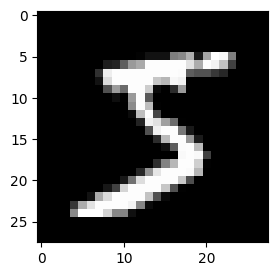

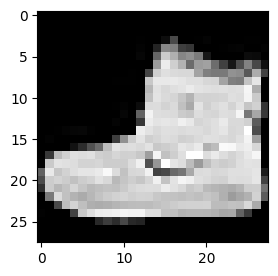

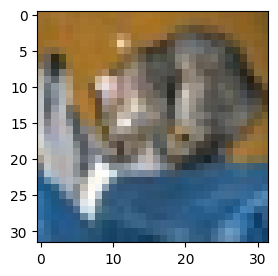

In [2]:
mnist = MNIST()
fashionmnist = FashionMNIST()
cifar10 = CIFAR10()



mnist.visual()
fashionmnist.visual()
cifar10.visual()


## I. MNIST + FashionMNIST Test

### K = 3

In [3]:
# Model K = 3
conv2d_nn_3 = nn.Sequential(
   Conv2d_NN(
      in_channels=1,
      out_channels=5,
      K=3,
      stride=3,
      padding=0,
      shuffle_scale=2
   ), 
   Conv2d_NN(
      in_channels=5,
      out_channels=10,
      K=3,
      stride=3,
      padding=0,
      shuffle_scale=2
   ),
   Conv2d_NN(
      in_channels=10,
      out_channels=20,
      K=3,
      stride=3,
      padding=0,
      shuffle_scale=2
   ),
   nn.Flatten(), 
   nn.Linear(15680, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_3, (1, 28, 28))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1               [-1, 4, 196]               0
            Conv1d-2              [-1, 20, 196]             260
              ReLU-3              [-1, 20, 196]               0
         Conv1d_NN-4              [-1, 20, 196]               0
         Conv2d_NN-5            [-1, 5, 28, 28]               0
           Flatten-6              [-1, 20, 196]               0
            Conv1d-7              [-1, 40, 196]           2,440
              ReLU-8              [-1, 40, 196]               0
         Conv1d_NN-9              [-1, 40, 196]               0
        Conv2d_NN-10           [-1, 10, 28, 28]               0
          Flatten-11              [-1, 40, 196]               0
           Conv1d-12              [-1, 80, 196]           9,680
             ReLU-13              [-1, 80, 196]               0
        Conv1d_NN-14              [-1, 

In [4]:
# MNIST results 
conv2d_nn_3.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_3.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_3, mnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_3, mnist.test_loader)

Epoch 1, Time: 44.378697872161865, Loss: 0.3661316014540348
Epoch 2, Time: 39.29632616043091, Loss: 0.24884289939965265
Epoch 3, Time: 38.77810001373291, Loss: 0.20466553338015003
Epoch 4, Time: 38.869231939315796, Loss: 0.17917939835686736
Epoch 5, Time: 39.0068199634552, Loss: 0.16098164942171148
Epoch 6, Time: 39.041168212890625, Loss: 0.1429407639262169
Epoch 7, Time: 38.898828983306885, Loss: 0.13220914608951825
Epoch 8, Time: 38.97258996963501, Loss: 0.12120653171517225
Epoch 9, Time: 38.799793004989624, Loss: 0.10836193469891162
Epoch 10, Time: 38.85076308250427, Loss: 0.10570902268944392

 Average epoch time: 39.48923192024231
Accuracy on test set: 94.96%


94.96

In [5]:
# Fashion MNIST results
conv2d_nn_3.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_3.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_3, fashionmnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_3, fashionmnist.test_loader)

Epoch 1, Time: 37.28849005699158, Loss: 0.4817773740111129
Epoch 2, Time: 37.83932375907898, Loss: 0.3626624120991113
Epoch 3, Time: 38.33485198020935, Loss: 0.3263348764511568
Epoch 4, Time: 37.28860592842102, Loss: 0.3020021556489376
Epoch 5, Time: 37.19302296638489, Loss: 0.2838479124629167
Epoch 6, Time: 37.83716678619385, Loss: 0.2668358688749103
Epoch 7, Time: 37.219655990600586, Loss: 0.25304154447639293
Epoch 8, Time: 37.0371949672699, Loss: 0.24426539490885063
Epoch 9, Time: 37.02301621437073, Loss: 0.23141266190722934
Epoch 10, Time: 37.10240411758423, Loss: 0.2213709855051056

 Average epoch time: 37.41637327671051
Accuracy on test set: 87.15%


87.15

### K = 5

In [6]:
# Model K = 5
conv2d_nn_5 = nn.Sequential(
   Conv2d_NN(
      in_channels=1,
      out_channels=5,
      K=5,
      stride=5,
      padding=0,
      shuffle_scale=2
   ), 
   Conv2d_NN(
      in_channels=5,
      out_channels=10,
      K=5,
      stride=5,
      padding=0,
      shuffle_scale=2
   ),
   Conv2d_NN(
      in_channels=10,
      out_channels=20,
      K=5,
      stride=5,
      padding=0,
      shuffle_scale=2
   ),
   nn.Flatten(), 
   nn.Linear(15680, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_5, (1, 28, 28))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1               [-1, 4, 196]               0
            Conv1d-2              [-1, 20, 196]             420
              ReLU-3              [-1, 20, 196]               0
         Conv1d_NN-4              [-1, 20, 196]               0
         Conv2d_NN-5            [-1, 5, 28, 28]               0
           Flatten-6              [-1, 20, 196]               0
            Conv1d-7              [-1, 40, 196]           4,040
              ReLU-8              [-1, 40, 196]               0
         Conv1d_NN-9              [-1, 40, 196]               0
        Conv2d_NN-10           [-1, 10, 28, 28]               0
          Flatten-11              [-1, 40, 196]               0
           Conv1d-12              [-1, 80, 196]          16,080
             ReLU-13              [-1, 80, 196]               0
        Conv1d_NN-14              [-1, 

In [7]:
# MNIST results 
conv2d_nn_5.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_5.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_5, mnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_5, mnist.test_loader)

Epoch 1, Time: 42.33623504638672, Loss: 0.36603617004112904
Epoch 2, Time: 41.90544891357422, Loss: 0.23594923833730633
Epoch 3, Time: 41.87471103668213, Loss: 0.1983940510400958
Epoch 4, Time: 42.10044193267822, Loss: 0.17787586731800456
Epoch 5, Time: 41.92670917510986, Loss: 0.1606172765694511
Epoch 6, Time: 41.98365378379822, Loss: 0.1474118186344605
Epoch 7, Time: 41.97923707962036, Loss: 0.1344138727878838
Epoch 8, Time: 42.080418825149536, Loss: 0.12365068418424585
Epoch 9, Time: 41.94388484954834, Loss: 0.11364020420504468
Epoch 10, Time: 41.9613082408905, Loss: 0.10595279018968534

 Average epoch time: 42.00920488834381
Accuracy on test set: 94.89%


94.89

In [8]:
# Fashion MNIST results
conv2d_nn_5.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_5.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_5, fashionmnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_5, fashionmnist.test_loader)

Epoch 1, Time: 39.81666588783264, Loss: 0.4772590083290519
Epoch 2, Time: 39.79671907424927, Loss: 0.36158701728211284
Epoch 3, Time: 39.69170689582825, Loss: 0.3287717687295698
Epoch 4, Time: 39.784239292144775, Loss: 0.30801766897950855
Epoch 5, Time: 39.7092559337616, Loss: 0.2899602104558238
Epoch 6, Time: 39.834818601608276, Loss: 0.2749415871732906
Epoch 7, Time: 39.70395588874817, Loss: 0.26328232126640105
Epoch 8, Time: 42.3412139415741, Loss: 0.25152577966975886
Epoch 9, Time: 41.773492097854614, Loss: 0.23908032051154546
Epoch 10, Time: 39.79569411277771, Loss: 0.23123858227674512

 Average epoch time: 40.22477617263794
Accuracy on test set: 87.87%


87.87

### K = 7

In [9]:
# Model K = 7
conv2d_nn_7 = nn.Sequential(
   Conv2d_NN(
      in_channels=1,
      out_channels=5,
      K=7,
      stride=7,
      padding=0,
      shuffle_scale=2
   ), 
   Conv2d_NN(
      in_channels=5,
      out_channels=10,
      K=7,
      stride=7,
      padding=0,
      shuffle_scale=2
   ),
   Conv2d_NN(
      in_channels=10,
      out_channels=20,
      K=7,
      stride=7,
      padding=0,
      shuffle_scale=2
   ),
   nn.Flatten(), 
   nn.Linear(15680, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_7, (1, 28, 28))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1               [-1, 4, 196]               0
            Conv1d-2              [-1, 20, 196]             580
              ReLU-3              [-1, 20, 196]               0
         Conv1d_NN-4              [-1, 20, 196]               0
         Conv2d_NN-5            [-1, 5, 28, 28]               0
           Flatten-6              [-1, 20, 196]               0
            Conv1d-7              [-1, 40, 196]           5,640
              ReLU-8              [-1, 40, 196]               0
         Conv1d_NN-9              [-1, 40, 196]               0
        Conv2d_NN-10           [-1, 10, 28, 28]               0
          Flatten-11              [-1, 40, 196]               0
           Conv1d-12              [-1, 80, 196]          22,480
             ReLU-13              [-1, 80, 196]               0
        Conv1d_NN-14              [-1, 

In [10]:
# MNIST results 
conv2d_nn_7.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_7.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_7, mnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_7, mnist.test_loader)

Epoch 1, Time: 48.068274974823, Loss: 0.3976671534941903
Epoch 2, Time: 46.4491229057312, Loss: 0.2622718020940005
Epoch 3, Time: 46.19762396812439, Loss: 0.21967519683116027
Epoch 4, Time: 46.35721397399902, Loss: 0.1936460409098978
Epoch 5, Time: 49.755199909210205, Loss: 0.17233015912404256
Epoch 6, Time: 47.26055407524109, Loss: 0.15857228823403305
Epoch 7, Time: 48.366148948669434, Loss: 0.1461435098673648
Epoch 8, Time: 47.38886117935181, Loss: 0.13255941291460827
Epoch 9, Time: 49.12002086639404, Loss: 0.12071113102038754
Epoch 10, Time: 48.915581941604614, Loss: 0.11257690519862958

 Average epoch time: 47.78786027431488
Accuracy on test set: 94.81%


94.81

In [11]:
# Fashion MNIST results
conv2d_nn_7.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_7.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_7, fashionmnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_7, fashionmnist.test_loader)

Epoch 1, Time: 44.86883211135864, Loss: 0.48277019261360676
Epoch 2, Time: 43.334060192108154, Loss: 0.36887295274878107
Epoch 3, Time: 46.42076897621155, Loss: 0.33330081491423313
Epoch 4, Time: 43.296793699264526, Loss: 0.31673972416264035
Epoch 5, Time: 43.328014850616455, Loss: 0.29919237486207917
Epoch 6, Time: 43.168302059173584, Loss: 0.27976212564752556
Epoch 7, Time: 43.413023948669434, Loss: 0.2689268535245329
Epoch 8, Time: 43.27133512496948, Loss: 0.25611193712427416
Epoch 9, Time: 43.22197723388672, Loss: 0.24329650769832292
Epoch 10, Time: 43.213078022003174, Loss: 0.23275448873972715

 Average epoch time: 43.75361862182617
Accuracy on test set: 87.98%


87.98

### K = 9

In [25]:
# Model K = 9
conv2d_nn_9 = nn.Sequential(
   Conv2d_NN(
      in_channels=1,
      out_channels=5,
      K=9,
      stride=9,
      padding=0,
      shuffle_scale=2
   ), 
   Conv2d_NN(
      in_channels=5,
      out_channels=10,
      K=9,
      stride=9,
      padding=0,
      shuffle_scale=2
   ),
   Conv2d_NN(
      in_channels=10,
      out_channels=20,
      K=9,
      stride=9,
      padding=0,
      shuffle_scale=2
   ),
   nn.Flatten(), 
   nn.Linear(15680, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_9, (1, 28, 28))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1               [-1, 4, 196]               0
            Conv1d-2              [-1, 20, 196]             740
              ReLU-3              [-1, 20, 196]               0
         Conv1d_NN-4              [-1, 20, 196]               0
         Conv2d_NN-5            [-1, 5, 28, 28]               0
           Flatten-6              [-1, 20, 196]               0
            Conv1d-7              [-1, 40, 196]           7,240
              ReLU-8              [-1, 40, 196]               0
         Conv1d_NN-9              [-1, 40, 196]               0
        Conv2d_NN-10           [-1, 10, 28, 28]               0
          Flatten-11              [-1, 40, 196]               0
           Conv1d-12              [-1, 80, 196]          28,880
             ReLU-13              [-1, 80, 196]               0
        Conv1d_NN-14              [-1, 

In [26]:
# MNIST results 
conv2d_nn_9.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_9.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_9, mnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_9, mnist.test_loader)

Epoch 1, Time: 56.175524950027466, Loss: 0.3862602050338727
Epoch 2, Time: 54.397582054138184, Loss: 0.2743589062728226
Epoch 3, Time: 54.12646698951721, Loss: 0.23963421701129947
Epoch 4, Time: 54.17603087425232, Loss: 0.21310391610285748
Epoch 5, Time: 54.254396200180054, Loss: 0.1905963975213357
Epoch 6, Time: 54.08118200302124, Loss: 0.17043190766403923
Epoch 7, Time: 54.115675926208496, Loss: 0.15556294434686016
Epoch 8, Time: 54.12574505805969, Loss: 0.1431041172644032
Epoch 9, Time: 54.02013278007507, Loss: 0.1336878972834965
Epoch 10, Time: 55.64913821220398, Loss: 0.12291624552326035

 Average epoch time: 54.51218750476837
Accuracy on test set: 94.61%


94.61

In [14]:
# Fashion MNIST results
conv2d_nn_9.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_9.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_9, fashionmnist.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_9, fashionmnist.test_loader)

Epoch 1, Time: 47.366111040115356, Loss: 0.48844724127859956
Epoch 2, Time: 47.13085627555847, Loss: 0.3784566232835306
Epoch 3, Time: 47.235535860061646, Loss: 0.34095393264217416
Epoch 4, Time: 47.17231512069702, Loss: 0.31857303404477616
Epoch 5, Time: 47.10814905166626, Loss: 0.30186824553779196
Epoch 6, Time: 47.193594217300415, Loss: 0.28676850617186095
Epoch 7, Time: 47.11716985702515, Loss: 0.2701285984168556
Epoch 8, Time: 47.147757053375244, Loss: 0.257220869498657
Epoch 9, Time: 47.27685308456421, Loss: 0.24703305021230218
Epoch 10, Time: 47.242358922958374, Loss: 0.23240337233299385

 Average epoch time: 47.19907004833222
Accuracy on test set: 87.12%


87.12

## II. CIFAR Test

In [15]:
# Model K = 3
conv2d_nn_3 = nn.Sequential(
   Conv2d_NN(
      in_channels=3,
      out_channels=5,
      K=3,
      stride=3,
      padding=0,
      shuffle_scale=2
   ), 
   Conv2d_NN(
      in_channels=5,
      out_channels=10,
      K=3,
      stride=3,
      padding=0,
      shuffle_scale=2
   ),
   Conv2d_NN(
      in_channels=10,
      out_channels=20,
      K=3,
      stride=3,
      padding=0,
      shuffle_scale=2
   ),
   nn.Flatten(), 
   nn.Linear(20480, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_3, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1              [-1, 12, 256]               0
            Conv1d-2              [-1, 20, 256]             740
              ReLU-3              [-1, 20, 256]               0
         Conv1d_NN-4              [-1, 20, 256]               0
         Conv2d_NN-5            [-1, 5, 32, 32]               0
           Flatten-6              [-1, 20, 256]               0
            Conv1d-7              [-1, 40, 256]           2,440
              ReLU-8              [-1, 40, 256]               0
         Conv1d_NN-9              [-1, 40, 256]               0
        Conv2d_NN-10           [-1, 10, 32, 32]               0
          Flatten-11              [-1, 40, 256]               0
           Conv1d-12              [-1, 80, 256]           9,680
             ReLU-13              [-1, 80, 256]               0
        Conv1d_NN-14              [-1, 

In [16]:
# CIFAR10 results 
conv2d_nn_3.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_3.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_3, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_3, cifar10.test_loader)


Epoch 1, Time: 37.115403175354004, Loss: 1.4528819757044469
Epoch 2, Time: 36.56245493888855, Loss: 1.153989863212761
Epoch 3, Time: 39.479387044906616, Loss: 1.013659304974939
Epoch 4, Time: 39.248059034347534, Loss: 0.9008192344928336
Epoch 5, Time: 39.257755279541016, Loss: 0.8007352685608218
Epoch 6, Time: 39.2049081325531, Loss: 0.7054281582689041
Epoch 7, Time: 39.86143732070923, Loss: 0.6210319713672714
Epoch 8, Time: 39.19889497756958, Loss: 0.5419789944463373
Epoch 9, Time: 39.51474094390869, Loss: 0.4702032761043295
Epoch 10, Time: 39.40202713012695, Loss: 0.408198574734161

 Average epoch time: 38.88450679779053
Accuracy on test set: 54.98%


54.98

In [17]:
# Model K = 5
conv2d_nn_5 = nn.Sequential(
   Conv2d_NN(
      in_channels=3,
      out_channels=5,
      K=5,
      stride=5,
      padding=0,
      shuffle_scale=2
   ), 
   Conv2d_NN(
      in_channels=5,
      out_channels=10,
      K=5,
      stride=5,
      padding=0,
      shuffle_scale=2
   ),
   Conv2d_NN(
      in_channels=10,
      out_channels=20,
      K=5,
      stride=5,
      padding=0,
      shuffle_scale=2
   ),
   nn.Flatten(), 
   nn.Linear(20480, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_5, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1              [-1, 12, 256]               0
            Conv1d-2              [-1, 20, 256]           1,220
              ReLU-3              [-1, 20, 256]               0
         Conv1d_NN-4              [-1, 20, 256]               0
         Conv2d_NN-5            [-1, 5, 32, 32]               0
           Flatten-6              [-1, 20, 256]               0
            Conv1d-7              [-1, 40, 256]           4,040
              ReLU-8              [-1, 40, 256]               0
         Conv1d_NN-9              [-1, 40, 256]               0
        Conv2d_NN-10           [-1, 10, 32, 32]               0
          Flatten-11              [-1, 40, 256]               0
           Conv1d-12              [-1, 80, 256]          16,080
             ReLU-13              [-1, 80, 256]               0
        Conv1d_NN-14              [-1, 

In [18]:
# CIFAR10 results 
conv2d_nn_5.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_5.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_5, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_5, cifar10.test_loader)


Epoch 1, Time: 40.22157001495361, Loss: 1.4766625893847716
Epoch 2, Time: 39.108527183532715, Loss: 1.1910287543483402
Epoch 3, Time: 39.09391403198242, Loss: 1.0622939713623212
Epoch 4, Time: 39.1548490524292, Loss: 0.9481413417002734
Epoch 5, Time: 39.223586082458496, Loss: 0.8532169157129419
Epoch 6, Time: 39.15462565422058, Loss: 0.7613887971319506
Epoch 7, Time: 39.14877390861511, Loss: 0.6809743040281794
Epoch 8, Time: 39.32047724723816, Loss: 0.6042535290160143
Epoch 9, Time: 39.1641001701355, Loss: 0.5349099812528971
Epoch 10, Time: 39.11915588378906, Loss: 0.48652432304437815

 Average epoch time: 39.27095792293549
Accuracy on test set: 53.83%


53.83

In [19]:
# Model K = 7
conv2d_nn_7 = nn.Sequential(
   Conv2d_NN(
      in_channels=3,
      out_channels=5,
      K=7,
      stride=7,
      padding=0,
      shuffle_scale=2
   ), 
   Conv2d_NN(
      in_channels=5,
      out_channels=10,
      K=7,
      stride=7,
      padding=0,
      shuffle_scale=2
   ),
   Conv2d_NN(
      in_channels=10,
      out_channels=20,
      K=7,
      stride=7,
      padding=0,
      shuffle_scale=2
   ),
   nn.Flatten(), 
   nn.Linear(20480, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_7, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1              [-1, 12, 256]               0
            Conv1d-2              [-1, 20, 256]           1,700
              ReLU-3              [-1, 20, 256]               0
         Conv1d_NN-4              [-1, 20, 256]               0
         Conv2d_NN-5            [-1, 5, 32, 32]               0
           Flatten-6              [-1, 20, 256]               0
            Conv1d-7              [-1, 40, 256]           5,640
              ReLU-8              [-1, 40, 256]               0
         Conv1d_NN-9              [-1, 40, 256]               0
        Conv2d_NN-10           [-1, 10, 32, 32]               0
          Flatten-11              [-1, 40, 256]               0
           Conv1d-12              [-1, 80, 256]          22,480
             ReLU-13              [-1, 80, 256]               0
        Conv1d_NN-14              [-1, 

In [20]:
# CIFAR10 results 
conv2d_nn_7.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_7.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_7, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_7, cifar10.test_loader)


Epoch 1, Time: 42.17409110069275, Loss: 1.5237627376985672
Epoch 2, Time: 41.5071496963501, Loss: 1.2523631431410074
Epoch 3, Time: 41.4782989025116, Loss: 1.1334932309282406
Epoch 4, Time: 41.50648808479309, Loss: 1.0313362185759922
Epoch 5, Time: 41.66964817047119, Loss: 0.9499446487487735
Epoch 6, Time: 41.445188999176025, Loss: 0.8664026476842973
Epoch 7, Time: 41.37710094451904, Loss: 0.798645005430407
Epoch 8, Time: 41.14787793159485, Loss: 0.7284174597705416
Epoch 9, Time: 41.18376898765564, Loss: 0.6677013165353204
Epoch 10, Time: 41.205881118774414, Loss: 0.6138661499980771

 Average epoch time: 41.46954939365387
Accuracy on test set: 54.05%


54.05

In [21]:
# Model K = 9
conv2d_nn_9 = nn.Sequential(
   Conv2d_NN(
      in_channels=3,
      out_channels=5,
      K=9,
      stride=9,
      padding=0,
      shuffle_scale=2
   ), 
   Conv2d_NN(
      in_channels=5,
      out_channels=10,
      K=9,
      stride=9,
      padding=0,
      shuffle_scale=2
   ),
   Conv2d_NN(
      in_channels=10,
      out_channels=20,
      K=9,
      stride=9,
      padding=0,
      shuffle_scale=2
   ),
   nn.Flatten(), 
   nn.Linear(20480, 10)
   
).to('cpu')
   

from torchsummary import summary
summary(conv2d_nn_9, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1              [-1, 12, 256]               0
            Conv1d-2              [-1, 20, 256]           2,180
              ReLU-3              [-1, 20, 256]               0
         Conv1d_NN-4              [-1, 20, 256]               0
         Conv2d_NN-5            [-1, 5, 32, 32]               0
           Flatten-6              [-1, 20, 256]               0
            Conv1d-7              [-1, 40, 256]           7,240
              ReLU-8              [-1, 40, 256]               0
         Conv1d_NN-9              [-1, 40, 256]               0
        Conv2d_NN-10           [-1, 10, 32, 32]               0
          Flatten-11              [-1, 40, 256]               0
           Conv1d-12              [-1, 80, 256]          28,880
             ReLU-13              [-1, 80, 256]               0
        Conv1d_NN-14              [-1, 

In [22]:
# CIFAR10 results 
conv2d_nn_9.to('mps')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv2d_nn_9.parameters(), lr=0.001)
num_epochs = 10 
train_model(conv2d_nn_9, cifar10.train_loader, criterion, optimizer, num_epochs)
evaluate_accuracy(conv2d_nn_9, cifar10.test_loader)


Epoch 1, Time: 45.72601795196533, Loss: 1.5697970762277198
Epoch 2, Time: 45.66117191314697, Loss: 1.2930565661634021
Epoch 3, Time: 45.557143688201904, Loss: 1.170089383564337
Epoch 4, Time: 79.83968114852905, Loss: 1.076210382268252
Epoch 5, Time: 115.28078603744507, Loss: 0.9920711728465527
Epoch 6, Time: 168.64127492904663, Loss: 0.9166686998303893
Epoch 7, Time: 302.93534779548645, Loss: 0.8432638091428201
Epoch 8, Time: 73.14140677452087, Loss: 0.7819110014859367
Epoch 9, Time: 48.44600200653076, Loss: 0.7169774077127656
Epoch 10, Time: 46.01000189781189, Loss: 0.6723613999688717

 Average epoch time: 97.12388341426849
Accuracy on test set: 54.16%


54.16